# GridSerachの使用例
sklearn.model_selection.GridSearchCV  
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

3.2. Tuning the hyper-parameters of an estimator
http://scikit-learn.org/stable/modules/grid_search.html#grid-search  

Mlxtend (machine learning extensions) is a Python library of useful tools for the day-to-day data science tasks <br>
https://rasbt.github.io/mlxtend/
- Plotting Decision Regions https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm # maplotlibのカラーマップを使用
%matplotlib inline

from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

from mlxtend.plotting import plot_decision_regions #決定領域のプロット，外部ライブラリを利用
#上記のインストールはAnacondaとは別途必要
FLAG_fig = False

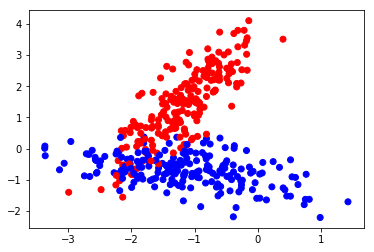

In [2]:
Num = 400 # 全サンプル数
CV = 5    # サンプル数をCV(Cross Validation)だけ分割する
X, y = make_classification( n_samples=Num, n_features=2, n_informative=2, n_redundant=0, 
                            n_classes=2, n_clusters_per_class=1, 
                            class_sep=1.0, #　分離度
                            shift=None, 
                            random_state=5) # 乱数の再現性
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm.bwr)
#if FLAG_fig: plt.savefig('fig_SVM_GridSearch_01.png')
plt.show()

In [3]:
# グリッドサーチ用パラメータの設定
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 1.0, 10.0], 'gamma':[0.01, 0.1, 1.0, 10.0]}
svc = svm.SVC()

In [4]:
# グリッドサーチの実行
clf = GridSearchCV(svc, parameters, scoring='accuracy', cv=CV)
clf.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [0.1, 1.0, 10.0], 'gamma': [0.01, 0.1, 1.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [5]:
# 最適パラメータの表示
print('Best accuracy = ',clf.best_score_)
print(clf.best_params_)

Best accuracy =  0.925
{'C': 10.0, 'gamma': 1.0, 'kernel': 'rbf'}


In [6]:
# 最適パラメータによる識別器を全データに適用，テストデータは後述
best_clf = clf.best_estimator_
pred = best_clf.predict(X)

print('Accuracy score = ',accuracy_score(y, pred))
print(classification_report(y, pred))

Accuracy score =  0.94
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       200
           1       0.96      0.92      0.94       200

   micro avg       0.94      0.94      0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



#### 新テストデータの作成
今回，度，make_classificationを用いて，データを発生させ，それをテストデータに用いる。

In [ ]:
Num = 100 # 追加サンプル数
X_test, y_test = make_classification( n_samples=Num, n_features=2, n_informative=2, n_redundant=0, 
                            n_classes=2, n_clusters_per_class=1, 
                            class_sep=1.0, #　分離度
                            shift=None, 
                            random_state=1) # 異なる確率過程
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=cm.bwr)
#if FLAG_fig: plt.savefig('fig_SVM_GridSearch_02.png')
plt.show()

In [ ]:
y_test_pred = best_clf.predict(X_test) # y_testに対するprediction

print('Accuracy score = ',accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,8), sharex=True, sharey=True)
plot_decision_regions(X,y, clf=best_clf,            res=0.02, ax=axes[0], legend=2)
axes[0].set_xlabel('(a) Traing data')

plot_decision_regions(X_test, y_test, clf=best_clf, res=0.02, ax=axes[1], legend=2)
axes[1].set_xlabel('(b) Test data')

if FLAG_fig: plt.savefig('fig_SVM_GridSearch_Result.png')
plt.show()